# Credit Card Attrition Rate Prediction
### Credit Card Churn Prediction

## About Attrition


### What is Customer Attrition?

The term Attrition refers to the number of people who move out of a larger group or gradually start dwindling in numbers. Attrition is a common term used by HR to describe Employee Turnover within the workplace. The concept, when extended to marketing, can be used to refer to customer attrition. In simple terms, Customer Attrition is when a business loses its customers. It is known by many names like Customer Churn and Customer turnover, but it all means the same thing -A customer who breaks all ties with the organization.

**There are two types of customer attrition:**

**Voluntary attrition:-**  when the customer decides to end the connection and not continue with the company.

**Involuntary attrition:-**  when a customer’s payment attempt is unsuccessful, so their subscription will be canceled.


**Depending on the nature of your business, the result might be:**

.Canceling a subscription 
.Closure of an account
.A sudden loss of transactions( Commonly observed in retail stores and e-commerce )
.Terminating a long term Service Agreement

Businesses infer that a customer has churned when they have not interacted with or purchased their services/products after a period of time. While customer attrition is a painful reality to face, it is important to understand that most customers will not remain with your business indefinitely.




### Attrition Rate:-
Calculating Customer Attrition Rate regularly helps keep track of the changes within the firm’s customer base and helps in making strategic decisions. Satisfying your existing customers is more affordable than acquiring new ones. If you notice early on that customers are leaving, you can identify the issues and rectify them instead of worrying about customer acquisition.


**Customer Attrition Rate Formula** = Number of customers lost at the end of the period (Churn) / Number of customers at the start of the period

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
Credit_Card=pd.read_csv("C:\\Users\\Akash\\Downloads\\credit_card_churn.csv.zip")

In [3]:
Credit_Card

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## Data Exploration

In [4]:
Credit_Card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
Credit_Card.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [6]:
Credit_Card.shape

(10127, 23)

* There are 10127 columns and 23 rows.

In [7]:
Credit_Card.size

232921

* There are total size of dataset 232921.

In [8]:
Credit_Card.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

* There are number of columns 10 integer datatype.
* There are number of columns 7 float datatype.
* There are number of columns 7 object datatype.

In [9]:
Credit_Card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
Credit_Card.isnull()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
Credit_Card.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

* There are not null Values.

In [12]:
Credit_Card.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [13]:
Credit_Card.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

## Examine Data

In [14]:
Credit_Card.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [15]:
Credit_Card.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

**Maximum number of Married Customers**

* Single Customer is less than Married Customers.

* Unknown Customer is less than Single Customers.

* Divorced Customer is less than Unknown Customers.


In [16]:
Credit_Card.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

* There are Maximum number of Existing Customers.
* There are Minimum number of Attried Customers.


### Existing Customers:-


Existing customers mean those who are active as of the closing date. Neglecting existing customers in quest of new ones is a common mistake because when you work with customers for an extended period, they become easier to serve. They understand your corporation, processes and values.

### Attrited Customers:-


Attrited customers are the group of customers that has been lost through time for any reason. The process of losing a client is referred to as customer attrition, also known as customer churn.




In [17]:
Credit_Card.Customer_Age.value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64

In [18]:
Credit_Card.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

* There are Maximum number of Female Customers.
* There are Minimum number of Male Customers.

In [19]:
Credit_Card.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

**There are Maximum number of Blue Credit Card.**

* Blue > Silver > Gold > Platinum

In [20]:
Credit_Card.Dependent_count.value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [21]:
Credit_Card.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

**There are Maximum number of Customers Graduate.**

**There are Minimum number of Customers Doctorate.**
* Graduate > High School > Unknown > Uneducated > College > Post-Graduate > Doctorate

In [22]:
Credit_Card.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

* Less than $40K > $40K - $60K > $80K - $120K > $60K - $80K > Unknown > $120K +
* There are Maximum number of Customers Move to **Less than $40K**


In [23]:
Credit_Card.Credit_Limit.value_counts()

34516.0    508
1438.3     507
15987.0     18
9959.0      18
23981.0     12
          ... 
10587.0      1
15340.0      1
34427.0      1
4975.0       1
3741.0       1
Name: Credit_Limit, Length: 6205, dtype: int64

In [24]:
Credit_Card.Credit_Limit.value_counts().mean()

1.6320709105560032

## Visualization of the Data
### Univariate Analysis

In [25]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="green",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)

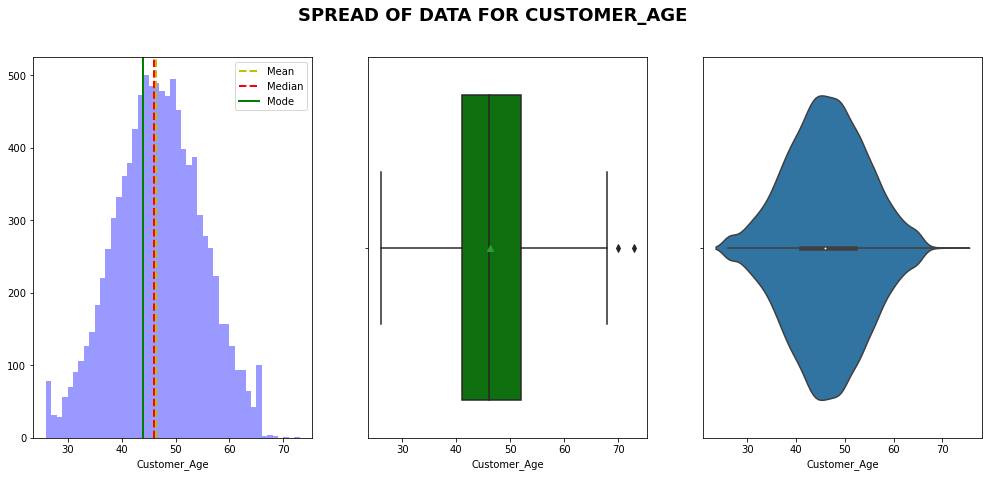

In [26]:
dist_box_violin(Credit_Card.Customer_Age)

* This is Right Skewed Data(Positive Skewed Data),(Mean > Median> Mode).
* There are two outliers Present

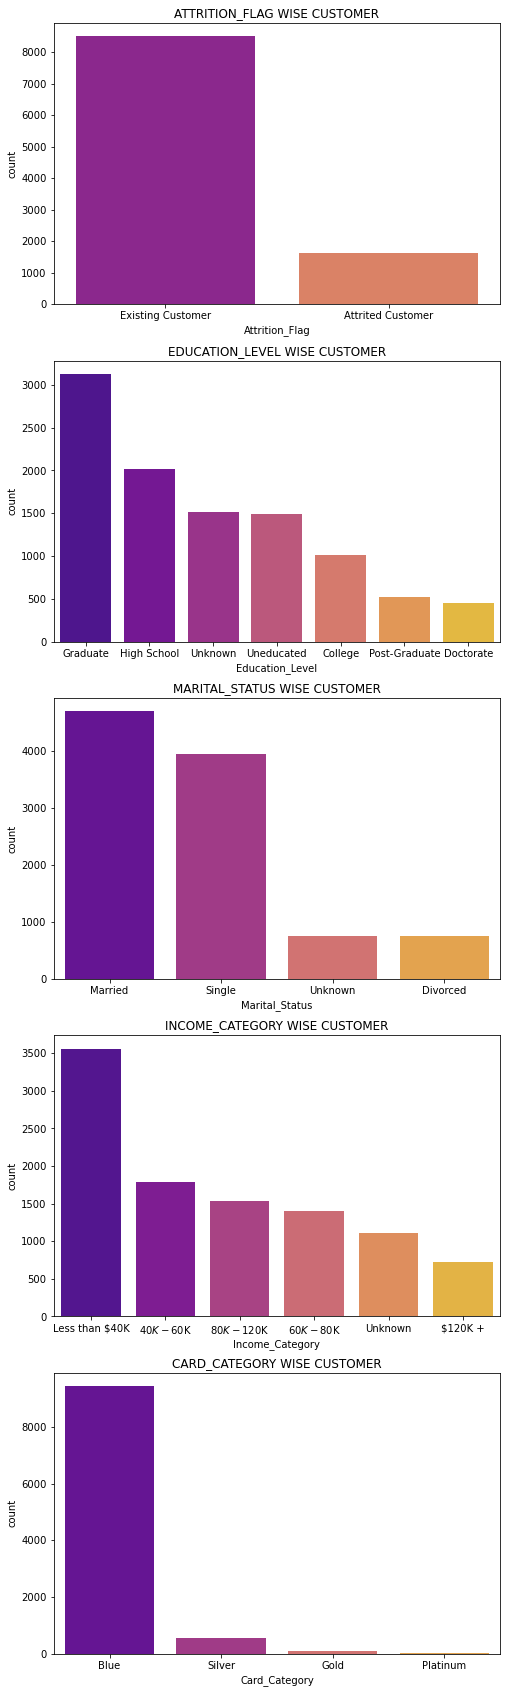

In [27]:
fig1, axes1 =plt.subplots(5,1,figsize=(8,30))
list_col=['Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category']
j=0
for i in range(len(list_col)):
    order = Credit_Card[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=Credit_Card , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE CUSTOMER')
   

**Existing Customer > Attried Customer**
* There are Maximum number of Existing Customers.
* There are Minimum number of Attried Customers.

**There are Maximum number of Customers Graduate.**

**There are Minimum number of Customers Doctorate.**
* Graduate > Hish School > Unknown > Uneducated > College > Post-Graduate > Doctorate

* Married > Single > Unknown > Divorce

**There are Maximum number of Customers Move to Less than $40K**
* Less than  40𝐾 > 40K -  60𝐾 > 80K -  120𝐾> 60K -  80𝐾 > 𝑈𝑛𝑘𝑛𝑜𝑤𝑛 > 120K +

**There are Maximum number of Blue Credit Card**
* Blue > Silver > Gold > Platinum

### Pie chart of Credit Card Attrition

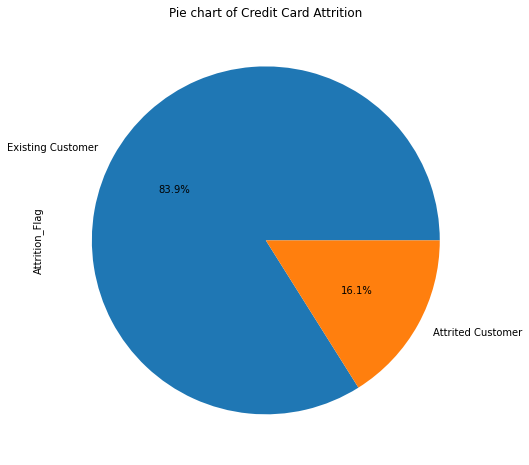

In [28]:
plt.figure(figsize=(14,7))
Credit_Card['Attrition_Flag'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Credit Card Attrition")
plt.show()

* There are Maximum Percentage of Existing Customers.
* There are Minimum Percentage of Attrited Customers.

## Bi Variate Analysis

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Gender                                                             
F                      0         1014            0             0   
M                    727          776         1402          1535   

Income_Category  Less than $40K  Unknown  
Gender                                    
F                          3284     1060  
M                           277       52  


Text(0.5, 1.0, 'GENDER BY INCOME_CATEGORY')

<Figure size 720x720 with 0 Axes>

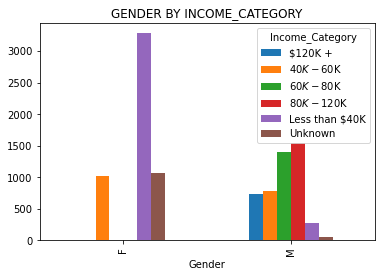

In [29]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(Credit_Card['Gender'],Credit_Card['Income_Category'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("GENDER BY INCOME_CATEGORY")

* There are Maximum number of Female Customers move to **Less than $40K**.

* There are Minimum number of Male Customers move ot **Less than $40K**.

Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   

Education_Level    Uneducated  Unknown  
Attrition_Flag                          
Attrited Customer         237      256  
Existing Customer        1250     1263  


Text(0.5, 1.0, 'ATTRITION BY EDUCATION_LEVEL')

<Figure size 720x720 with 0 Axes>

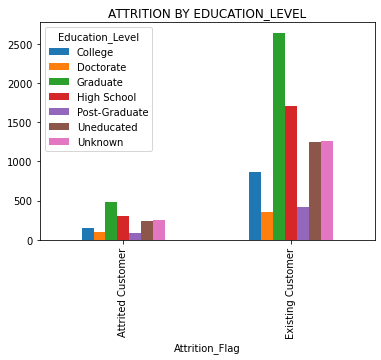

In [30]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(Credit_Card['Attrition_Flag'],Credit_Card['Education_Level'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("ATTRITION BY EDUCATION_LEVEL")

**Attrited Customer:-**
* Graduate > High Scool > Unknown > Uneducated > Collage > Doctorate > Post-Garduate
* There are Maximum number of Grduate Attrited Customers.
* There are Minimum number of Post-Graduate Attrited Customers.

**Existing Customers:-**
* Graduate > High Scool > Unknown > Uneducated > Collage > Doctorate > Post-Garduate
* There are Maximum number of Graduate Existing Customers.
* There are Mininum number of Post-Graduate Existing Customers.

**Conclusion**
* Existing Customers > Attrited Customers




### Attrition By Marital Status

Marital_Status     Divorced  Married  Single  Unknown
Attrition_Flag                                       
Attrited Customer       121      709     668      129
Existing Customer       627     3978    3275      620


Text(0.5, 1.0, 'ATTRITION BY MARITAL_STATUS')

<Figure size 720x720 with 0 Axes>

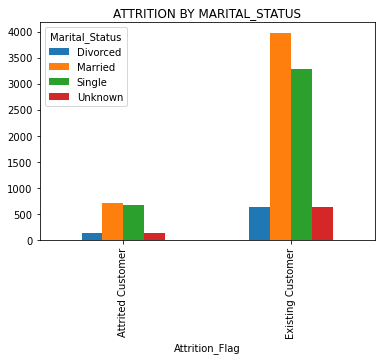

In [31]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(Credit_Card['Attrition_Flag'],Credit_Card['Marital_Status'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("ATTRITION BY MARITAL_STATUS")

**Attrited Customers:-**
* Married > Single > Divorced > Unknown
* There are Maximum number of Married Attrited Customers
* There are Minimum number of Unknown Attrited Customers

**Existing Customers:-**
* Married > Single > Divorced > Unknown
* There are Maximum number of Married Existing Customers.
* There are Minimum number of Unknown Existing Customers

### Gender By Card Category

Card_Category  Blue  Gold  Platinum  Silver
Gender                                     
F              5101    38         9     210
M              4335    78        11     345


Text(0.5, 1.0, 'GENDER BY CARD_CATEGORY')

<Figure size 720x720 with 0 Axes>

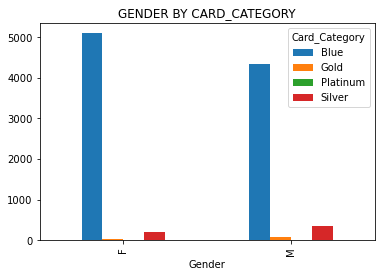

In [32]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(Credit_Card['Gender'],Credit_Card['Card_Category'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("GENDER BY CARD_CATEGORY" )

**Female:-**
* Blue > Silver > Gold > Platinum
* Female have Maximum number of Blue Credit Card.
* Female have Minimum number of Platinum Credit Card.


**Male:-**
* Blue > Silver > Gold > Platinum
* Male have Maximum number of Blue Credit Card.
* Male have Mininum number of Platinum Credit Card

**Conclusion:-**
* **Maximum Female move to Blue Credit Card than Compare to Male**

### Attrition By Gender

Gender                F     M
Attrition_Flag               
Attrited Customer   930   697
Existing Customer  4428  4072


Text(0.5, 1.0, 'ATTRITION BY Gender')

<Figure size 720x720 with 0 Axes>

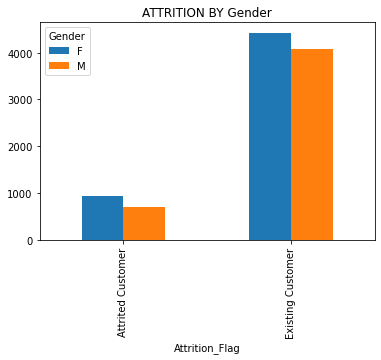

In [33]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(Credit_Card['Attrition_Flag'],Credit_Card['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("ATTRITION BY Gender")

* Female Attrited Customers 930.
* Male Attrited Customers 697.
* Female Existing Customers 4428.
* Male Existing Customers 4072.

### Heat Map

<AxesSubplot:>

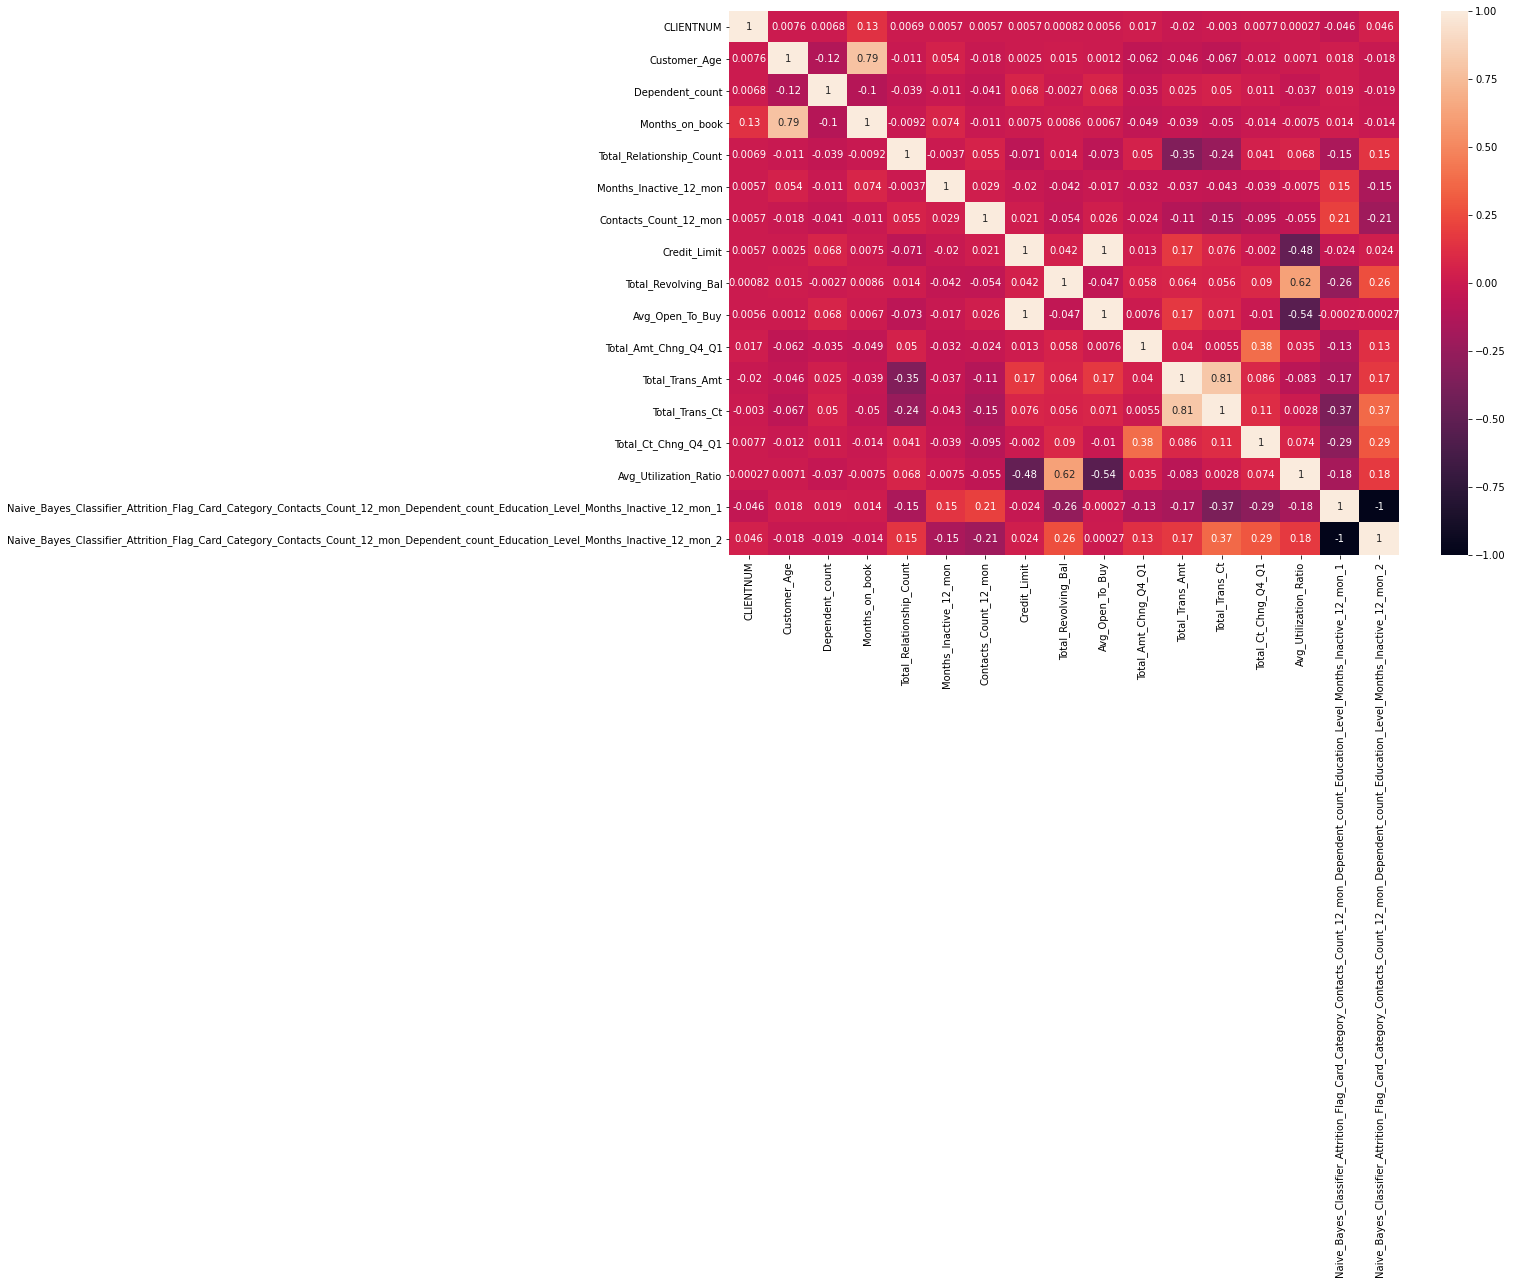

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(Credit_Card.corr(), annot=True) 

### Join plot

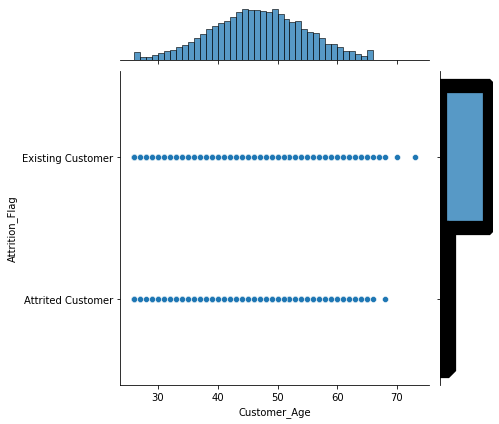

In [35]:
sns.jointplot(x=Credit_Card['Customer_Age'],y=Credit_Card['Attrition_Flag'])

* Attrition_Flag and Customer_Age are going to parallel.

## Multivariate Analysis

<Figure size 2160x2520 with 0 Axes>

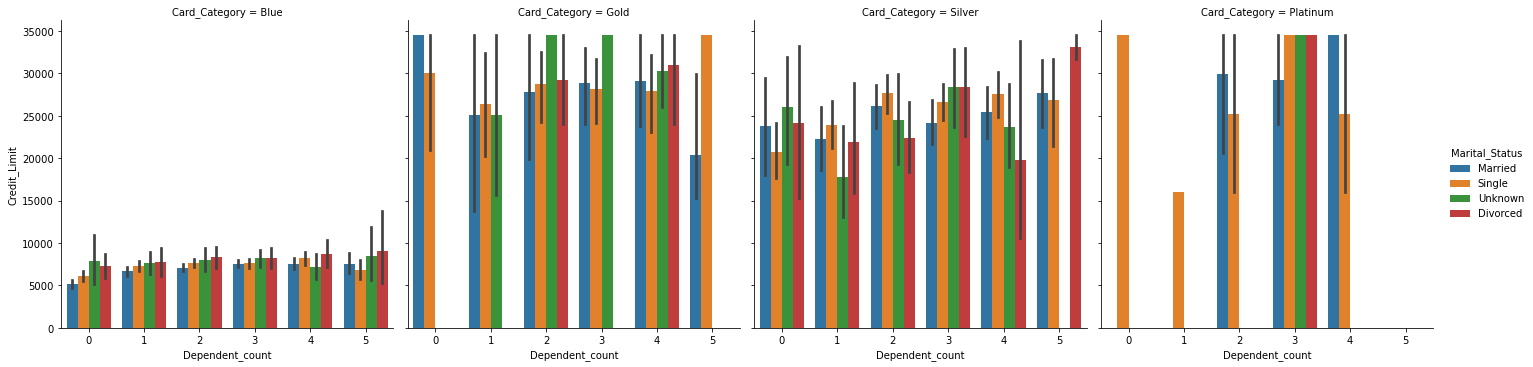

In [36]:
plt.figure(figsize=(30,35))
sns.catplot(x='Dependent_count', y='Credit_Limit', col='Card_Category',hue='Marital_Status' ,kind="bar", data=Credit_Card) 

In [37]:

prd_mar_gen= pd.crosstab(index=Credit_Card["Attrition_Flag"], 
                             columns=[Credit_Card["Marital_Status"],
                                      Credit_Card["Gender"]] ,
                             )  
prd_mar_gen

Marital_Status    Divorced      Married       Single       Unknown     
Gender                   F    M       F     M      F     M       F    M
Attrition_Flag                                                         
Attrited Customer       68   53     412   297    381   287      69   60
Existing Customer      334  293    2039  1939   1744  1531     311  309

<AxesSubplot:xlabel='Attrition_Flag'>

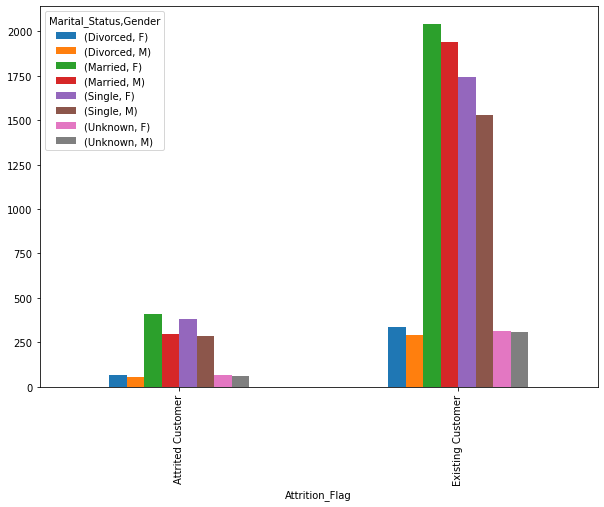

In [38]:
prd_mar_gen.plot(kind='bar',figsize=(10,7))

* In Existing Customers, Married Female moved to high level.

## Data Prediction Model
### Using Logistic Regression

In [39]:
Credit_Card=Credit_Card[["Gender","Customer_Age","Attrition_Flag","Dependent_count","Education_Level","Marital_Status","Card_Category","Credit_Limit"]]

Credit_Card.dropna(axis=0,inplace=True)

In [40]:
Credit_Card["Gender"].replace(["M","F"],[0,1],inplace=True)
Credit_Card["Attrition_Flag"].replace(["Attrited Customer","Existing Customer"],[0,1],inplace=True)
Credit_Card["Education_Level"].replace(["College","Doctorate","Graduate","High School","Post-Graduate","Uneducated","Unknown"],[0,1,2,3,4,5,6],inplace=True)
Credit_Card["Marital_Status"].replace(["Married","Single","Unknown","Divorced"],[0,1,2,3],inplace=True)


Credit_Card["Card_Category"].replace(["Blue","Silver","Gold","Platinum"],[0,1,2,3],inplace=True)


Credit_Card.head()

,Gender,Customer_Age,Attrition_Flag,Dependent_count,Education_Level,Marital_Status,Card_Category,Credit_Limit
0,0,45,1,3,3,0,0,12691.0
1,1,49,1,5,2,1,0,8256.0
2,0,51,1,3,2,0,0,3418.0
3,1,40,1,4,3,2,0,3313.0
4,0,40,1,3,5,0,0,4716.0


In [41]:
Y=Credit_Card["Attrition_Flag"]
X=Credit_Card.drop("Attrition_Flag",axis=1)

In [42]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [43]:
X

,Gender,Customer_Age,Dependent_count,Education_Level,Marital_Status,Card_Category,Credit_Limit
0,0,45,3,3,0,0,12691.0
1,1,49,5,2,1,0,8256.0
2,0,51,3,2,0,0,3418.0
3,1,40,4,3,2,0,3313.0
4,0,40,3,5,0,0,4716.0
...,...,...,...,...,...,...,...
10122,0,50,2,2,1,0,4003.0
10123,0,41,2,6,3,0,4277.0
10124,1,44,1,3,0,0,5409.0
10125,0,30,2,2,2,0,5281.0


### Splitting the dataset into the Training set and Test set

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

### Training the Logistic Regression model on Training Set

In [46]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

### Predicting the Test Set Results

In [47]:
Y_pred=classifier.predict(X_test)

### Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,Y_pred)
print(cm)


[[   0  384]
 [   0 2148]]


In [49]:
confusion_matrix(Y_test,Y_test)

array([[ 384,    0],
       [   0, 2148]], dtype=int64)

In [50]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       384
           1       0.85      1.00      0.92      2148

    accuracy                           0.85      2532
   macro avg       0.42      0.50      0.46      2532
weighted avg       0.72      0.85      0.78      2532



### Accuracy

In [51]:
Accuracy=accuracy_score(Y_test,Y_pred)

In [52]:
round(Accuracy,2)

0.85

* We got 85% accuracy.

### Precision and Recall

In [53]:
from sklearn.metrics import precision_score,recall_score

In [54]:
round(precision_score(Y_test,Y_pred),2)

0.85

In [55]:
recall_score(Y_test,Y_pred)

1.0

* We got 100% recoll score

### F1-Score

In [56]:
from sklearn.metrics import f1_score

In [57]:
f1_score=round(f1_score(Y_test,Y_pred))

In [58]:
f1_score

1

* We got 100% F1 Score.